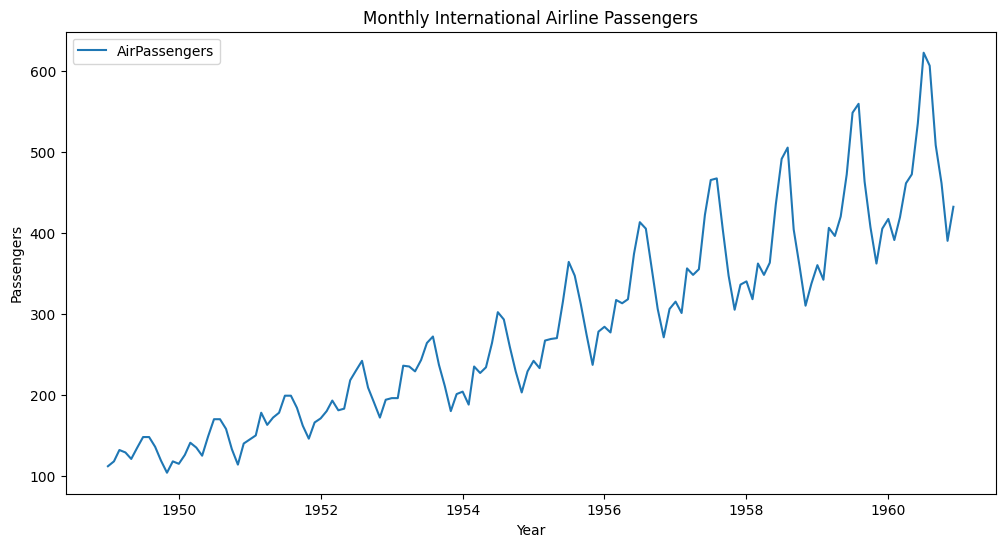

In [12]:
#Question 1 : Load and Visualize a Time Series Dataset
#Load the "AirPassengers" dataset and plot the time series.
#Dataset : https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
 
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df, label='AirPassengers')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers',)
plt.legend()
plt.show()


In [ ]:
#Question 2 : Check for Missing Values and Summary Stats
#Display missing values and basic statistics for the “AirPassengers” dataset.

# Check missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

# Basic statistics
stats = df.describe()
print("\nSummary Statistics:\n", stats)


Missing Values:
 Passengers    0
dtype: int64

Summary Statistics:
        Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


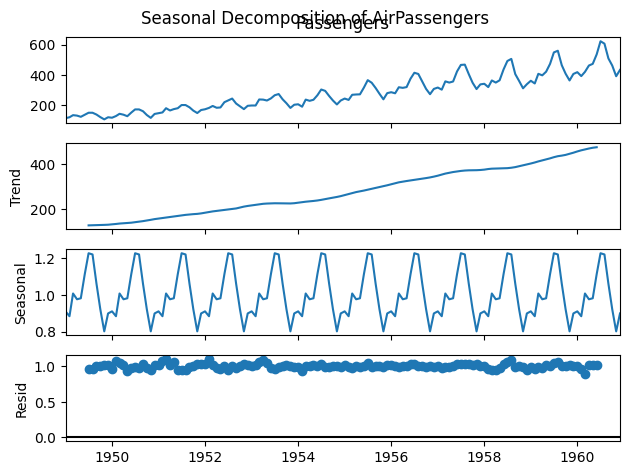

In [3]:
#Question 3 : Decompose the Time Series
#Decompose the time series into trend, seasonality, and residuals for the “AirPassengers” dataset.

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot components
result.plot()
plt.suptitle('Seasonal Decomposition of AirPassengers')
plt.show()


In [5]:
#Question 4 : Check Stationarity with Augmented Dickey-Fuller Test
#Check if the time series is stationary for the above dataset.
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Passengers'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print("Critical Value ({}): {:.4f}".format(key, value))


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Value (1%): -3.4817
Critical Value (5%): -2.8840
Critical Value (10%): -2.5788


In [6]:
#Question 5 : Split the Dataset into Train and Test
#Split the time series into 80% train and 20% test for the above dataset.
# Calculate split index
split = int(len(df) * 0.8)

train = df.iloc[:split]
test = df.iloc[split:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (115, 1)
Test shape: (29, 1)
